<a href="https://colab.research.google.com/github/Amrutha123BS/Cardiovascular-Risk-prediction/blob/main/Capstone_project_2_Cardiovascular_Risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description of DataSet Given:**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

**Variables**

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

**Data Description**

**Demographic:**

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

**Predict variable (desired target)**

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

 # **Data Exploration**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
crp_df = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone Project - Supervised ML- Cardiovascular risk prediction/data_cardiovascular_risk.csv")

In [4]:
crp_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
crp_df.shape

(3390, 17)

In [6]:
def crp_dfinfo():
    temp = pd.DataFrame(index=crp_df.columns)
    temp['data_type'] = crp_df.dtypes
    temp["count of non null values"] = crp_df.count()
    temp['NaN values'] = crp_df.isnull().sum()
    temp['% NaN values'] = (temp['NaN values']/len(crp_df)).round(4)*100 # or crp_df.isnull().mean()
    temp['unique_count'] = crp_df.nunique()
    return temp 
crp_dfinfo()

,data_type,count of non null values,NaN values,% NaN values,unique_count
id,int64,3390,0,0.00,3390
age,int64,3390,0,0.00,39
education,float64,3303,87,2.57,4
sex,object,3390,0,0.00,2
is_smoking,object,3390,0,0.00,2
cigsPerDay,float64,3368,22,0.65,32
BPMeds,float64,3346,44,1.30,2
prevalentStroke,int64,3390,0,0.00,2
prevalentHyp,int64,3390,0,0.00,2
diabetes,int64,3390,0,0.00,2


We Have NaN values

# Handling NaN values or Missing values

In [7]:
# Total NaN values
(crp_df.isnull().sum()).sum()

510

In [8]:
crp_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [9]:
# Id column can be dropped off
crp_df.drop("id",axis=1,inplace= True)

In [10]:
crp_df.TenYearCHD.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [11]:
crp_df[(crp_df["TenYearCHD"]==1) & (crp_df.education.isnull())].shape

(13, 16)

In [12]:
crp_df[(crp_df["TenYearCHD"]==1) & (crp_df.cigsPerDay.isnull())].shape

(1, 16)

In [13]:
crp_df[(crp_df["TenYearCHD"]==1) & (crp_df.BPMeds.isnull())].shape

(7, 16)

In [14]:
crp_df[(crp_df["TenYearCHD"]==1) & (crp_df.totChol.isnull())].shape

(7, 16)

In [15]:
crp_df[(crp_df["TenYearCHD"]==1) & (crp_df.BMI.isnull())].shape

(7, 16)

In [16]:
crp_df[(crp_df["TenYearCHD"]==1) & (crp_df.heartRate.isnull())].shape

(1, 16)

In [17]:
crp_df[(crp_df["TenYearCHD"]==1) & (crp_df.glucose.isnull())].shape

(39, 16)

out 304 NaN values of Glucose column we have 39 (that is 12% of the missing data) values are from minority class.

Note: out of 510 NaN values 75 are from minority classes (14% of total NaN value data are having minority classes)

out of 511 minority classes- if we delete all the NaN values- 

before deleting- it is 15%
After deleting - it will become- 12% (511- 75 = 436 /3390 = 12.8 = 13%(two percent drop in minority classes)
since 2% drop we ignored.

In [18]:
crp_df.dropna(inplace=True)

In [19]:
crp_df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [20]:
crp_df.shape

(2927, 16)

In [21]:
crp_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


# Feature Selection

## Histogram and density plots

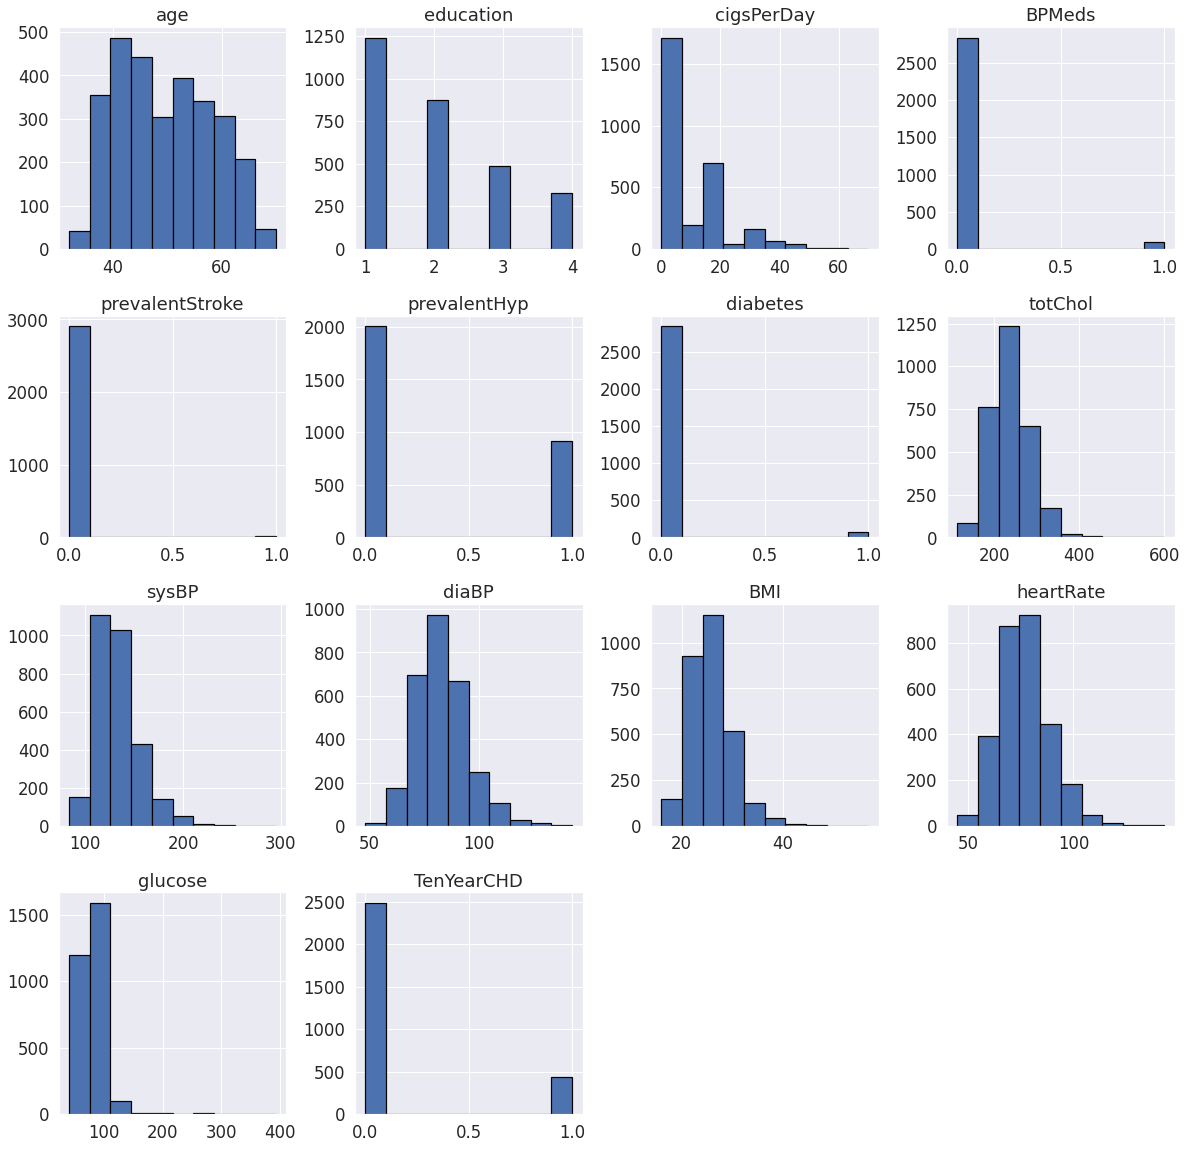

In [22]:
sns.set(font_scale=1.5)
crp_df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

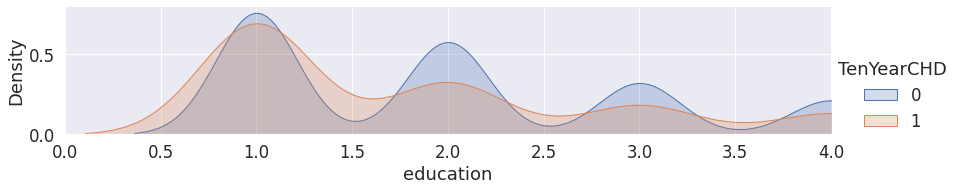

In [23]:
fig = sns.FacetGrid(crp_df, hue="TenYearCHD", aspect=4)
fig.map(sns.kdeplot, 'education', shade=True)
oldest = crp_df['education'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

From the above graph we did not get any inference like....higher the eduaction higher the heart issues and vice versa...so lets drop the education

In [24]:
crp_df.drop("education",axis=1,inplace= True)

In [25]:
crp_df.BPMeds.value_counts()

0.0    2839
1.0      88
Name: BPMeds, dtype: int64

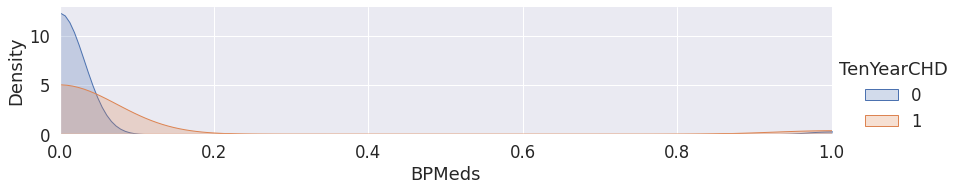

In [26]:
fig = sns.FacetGrid(crp_df, hue="TenYearCHD", aspect=4)
fig.map(sns.kdeplot, 'BPMeds', shade=True)
oldest = crp_df['BPMeds'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

From the histogram plot and density plot of BPMeds we do not find much information since the variance is very low. hence we are dropping this feature.

In [27]:
crp_df.drop("BPMeds",axis=1,inplace=True)

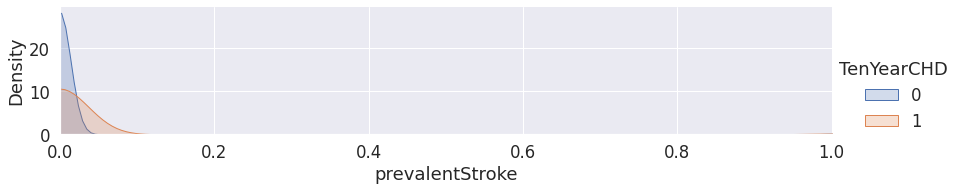

In [28]:
fig = sns.FacetGrid(crp_df, hue="TenYearCHD", aspect=4)
fig.map(sns.kdeplot, 'prevalentStroke', shade=True)
oldest = crp_df['prevalentStroke'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

From the histogram plot and density plot of prevalentStroke we do not find much information since the variance is very low. hence we are dropping this feature.

In [29]:
crp_df.drop("prevalentStroke",axis=1,inplace=True)

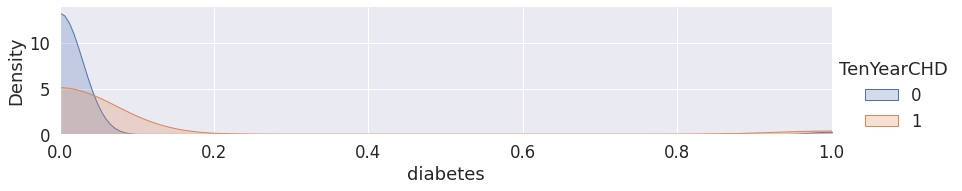

In [30]:
fig = sns.FacetGrid(crp_df, hue="TenYearCHD", aspect=4)
fig.map(sns.kdeplot, 'diabetes', shade=True)
oldest = crp_df['diabetes'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

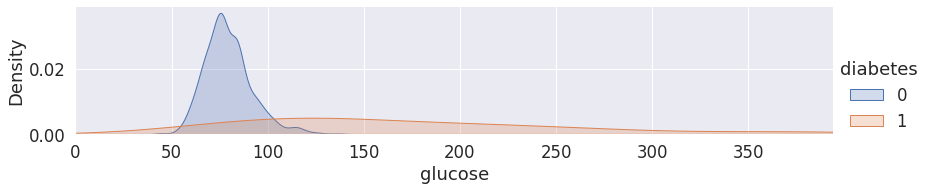

In [31]:
fig = sns.FacetGrid(crp_df, hue="diabetes", aspect=4)
fig.map(sns.kdeplot, 'glucose', shade=True)
oldest = crp_df['glucose'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

In [32]:
crp_df["glucose"].corr(crp_df["diabetes"]== 1)

0.6171891743336101

In [33]:
crp_df.diabetes.value_counts()

0    2848
1      79
Name: diabetes, dtype: int64

In [34]:
crp_df["diabetes"].corr(crp_df["TenYearCHD"])

0.10000621738409106

Glucose and diabetes (independent variables) are having higher correlation value.[less the glucose non-diabetic the person is) but there is no much correlation with higher the glucose the person is diabetic.
and also diabetes having just 10% correlation with the target variable.
also it has low variance.
hence dropping this feature.

In [35]:
crp_df.drop('diabetes',axis=1,inplace=True)

In [36]:
crp_df.columns

Index(['age', 'sex', 'is_smoking', 'cigsPerDay', 'prevalentHyp', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

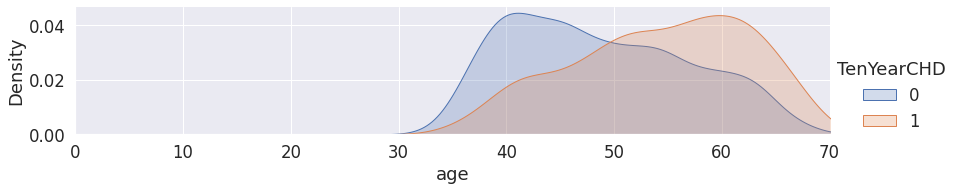

In [37]:
fig = sns.FacetGrid(crp_df, hue="TenYearCHD", aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = crp_df['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

## Feature Engineering 

In [38]:
crp_df["sysBP"].corr(crp_df["diaBP"])

0.7835863668873302

since these two varibles are highly correlated(almost 80%) we can combine these two features and deriving new feature out of it as below.

**Deriving new feature AvgBP = sysBP+diaBP/2** 

hence- dropping diaBP and sysBP.



In [39]:
crp_df["avgBP"]= round((crp_df["sysBP"]+crp_df["diaBP"])/2,2)

In [40]:
crp_df.drop("sysBP",axis=1,inplace=True)
crp_df.drop("diaBP",axis=1,inplace=True)

In [41]:
crp_df.head()

,age,sex,is_smoking,cigsPerDay,prevalentHyp,totChol,BMI,heartRate,glucose,TenYearCHD,avgBP
1,36,M,NO,0.0,1,212.0,29.77,72.0,75.0,0,133.00
2,46,F,YES,10.0,0,250.0,20.35,88.0,94.0,0,93.50
3,50,M,YES,20.0,1,233.0,28.26,68.0,94.0,1,123.00
4,64,F,YES,30.0,0,241.0,26.42,70.0,77.0,0,110.75
5,61,F,NO,0.0,1,272.0,32.80,85.0,65.0,1,151.50


In [42]:
#One Hot Encoding to the variables- SEX and IS_SMOKING:
  #binary encoding
crp_df['sex']= crp_df['sex'].apply(lambda x: 1 if x=='M' else 0)
crp_df['is_smoking']= crp_df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

In [43]:
crp_df.head()

,age,sex,is_smoking,cigsPerDay,prevalentHyp,totChol,BMI,heartRate,glucose,TenYearCHD,avgBP
1,36,1,0,0.0,1,212.0,29.77,72.0,75.0,0,133.00
2,46,0,1,10.0,0,250.0,20.35,88.0,94.0,0,93.50
3,50,1,1,20.0,1,233.0,28.26,68.0,94.0,1,123.00
4,64,0,1,30.0,0,241.0,26.42,70.0,77.0,0,110.75
5,61,0,0,0.0,1,272.0,32.80,85.0,65.0,1,151.50


## OUTLIER DETECTION 

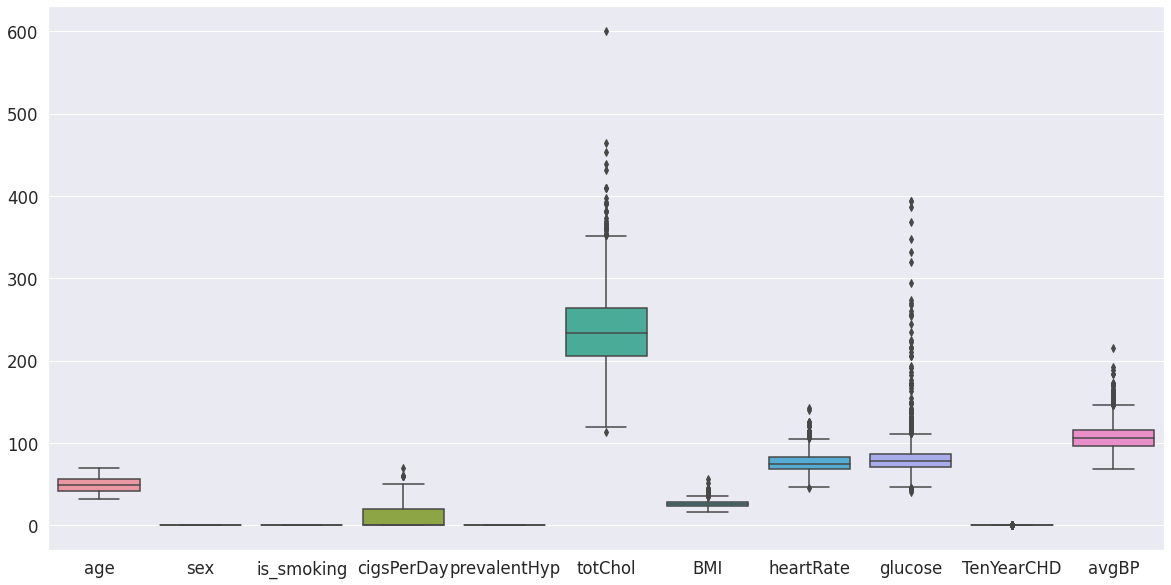

In [44]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=crp_df)
plt.show()

In [45]:
print(crp_df.totChol.min())
print(crp_df.totChol.max())
print(crp_df.totChol.mean())

# Normal - 100 to 200
# max -  200 to 239

113.0
600.0
237.12914246668944


In [46]:
crp_df[crp_df['totChol']>=500]

,age,sex,is_smoking,cigsPerDay,prevalentHyp,totChol,BMI,heartRate,glucose,TenYearCHD,avgBP
423,52,0,0,0.0,1,600.0,28.27,78.0,140.0,1,126.75


Totchol has an outlier- the value 600. 
hence we are dropping this row.

In [47]:
crp_df.drop(423,inplace=True)

In [48]:
crp_df.loc[420:425,:]

,age,sex,is_smoking,cigsPerDay,prevalentHyp,totChol,BMI,heartRate,glucose,TenYearCHD,avgBP
420,40,0,1,20.0,0,165.0,23.06,60.0,76.0,0,80.00
421,50,0,0,0.0,0,281.0,23.44,85.0,79.0,0,90.75
424,48,0,0,0.0,0,237.0,33.29,80.0,91.0,0,95.50
425,43,1,1,20.0,0,187.0,25.62,80.0,75.0,0,108.75


Outliers in other features are important since we are concerned with the people who are having high heart risk.
hence we cannot remove it.

In [49]:
crp_df.columns

Index(['age', 'sex', 'is_smoking', 'cigsPerDay', 'prevalentHyp', 'totChol',
       'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'avgBP'],
      dtype='object')

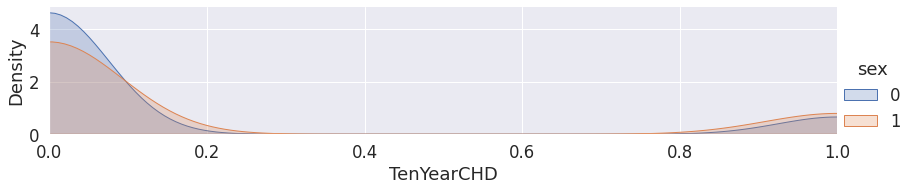

In [50]:
fig = sns.FacetGrid(crp_df, hue="sex", aspect=4)
fig.map(sns.kdeplot, 'TenYearCHD', shade=True)
oldest = crp_df['TenYearCHD'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

##Density Plots of all the features

###Density plots without any transformations

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


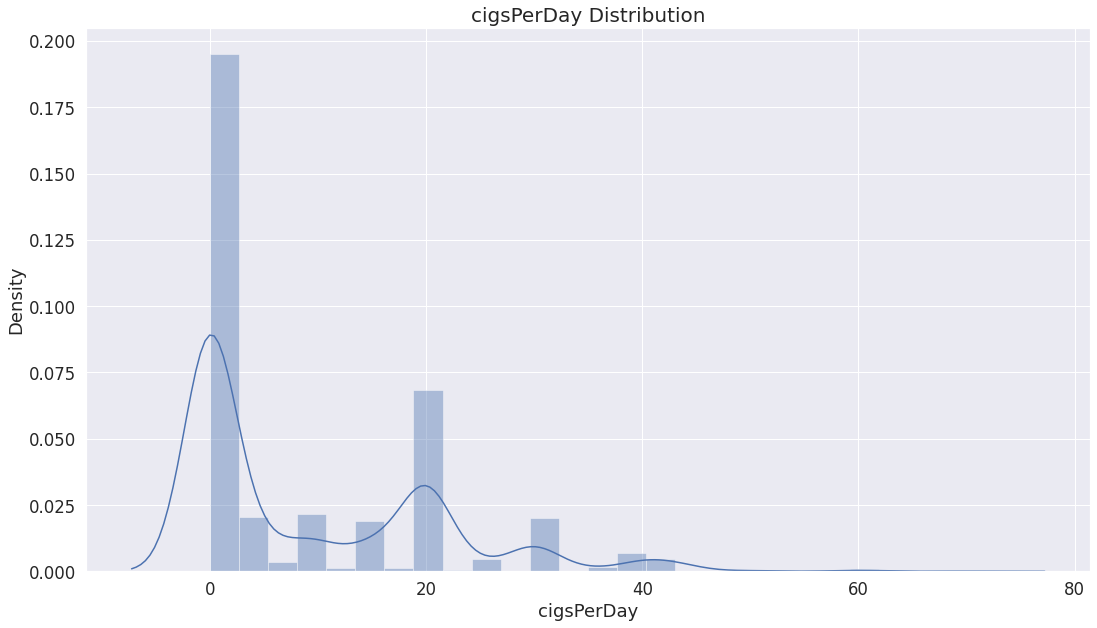

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


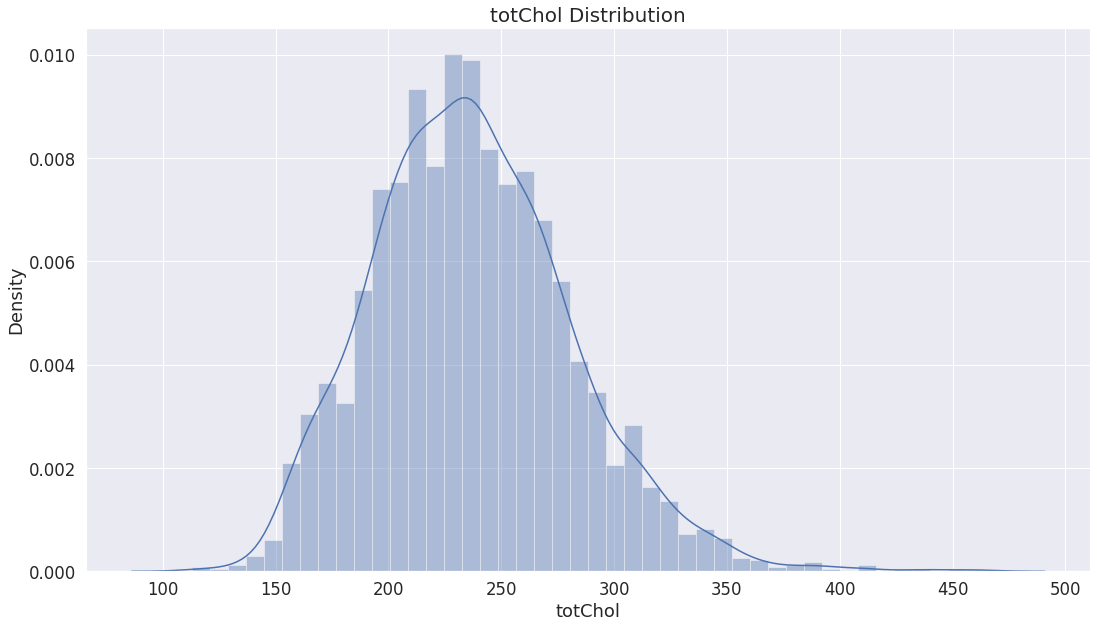

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


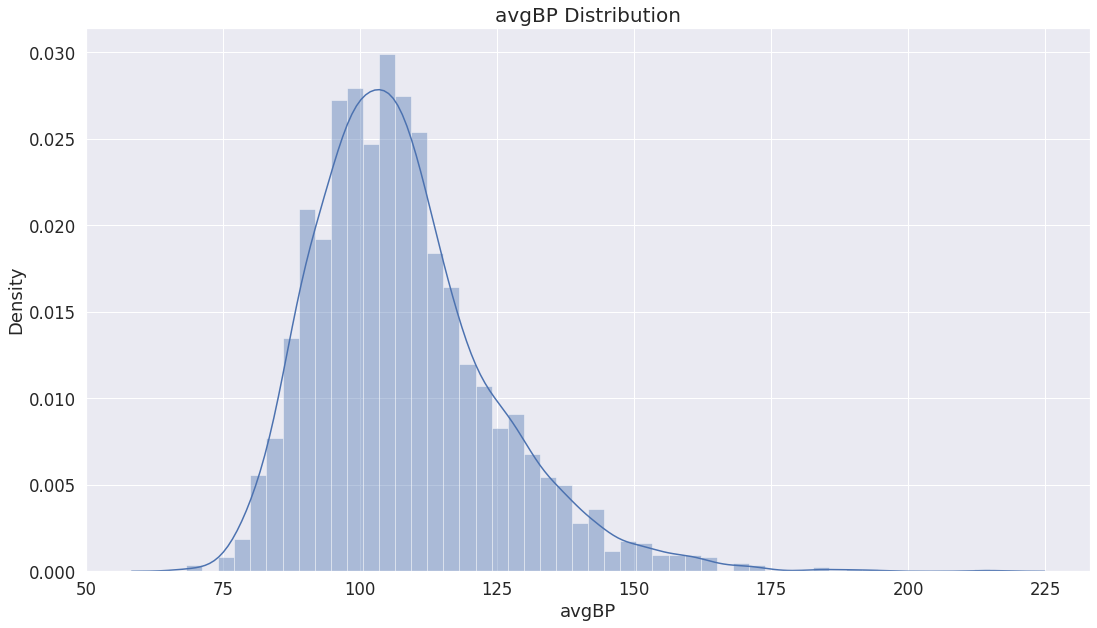

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


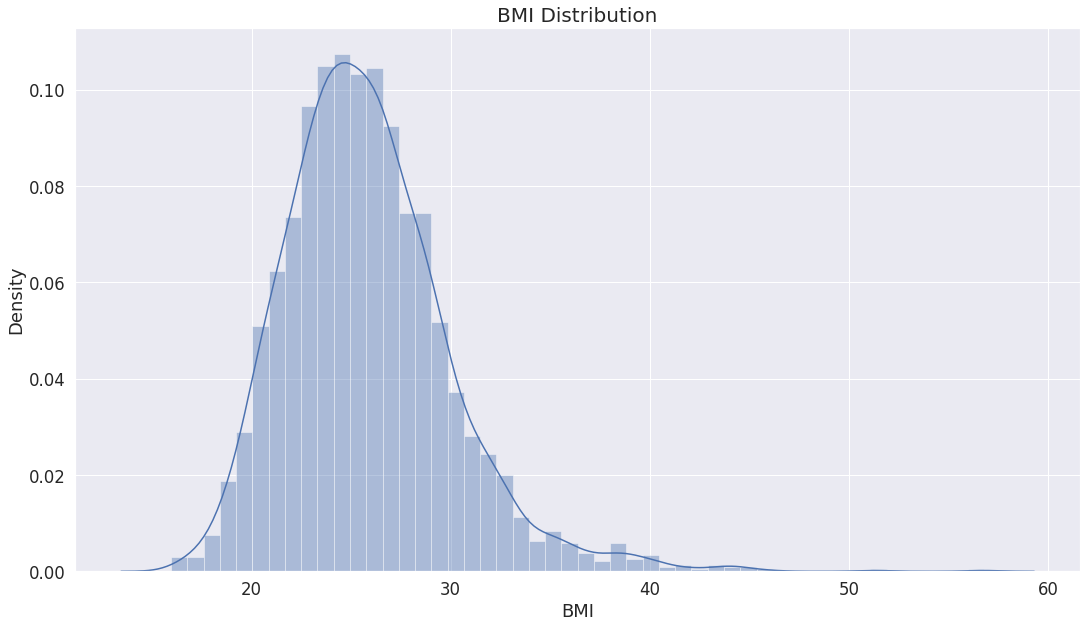

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


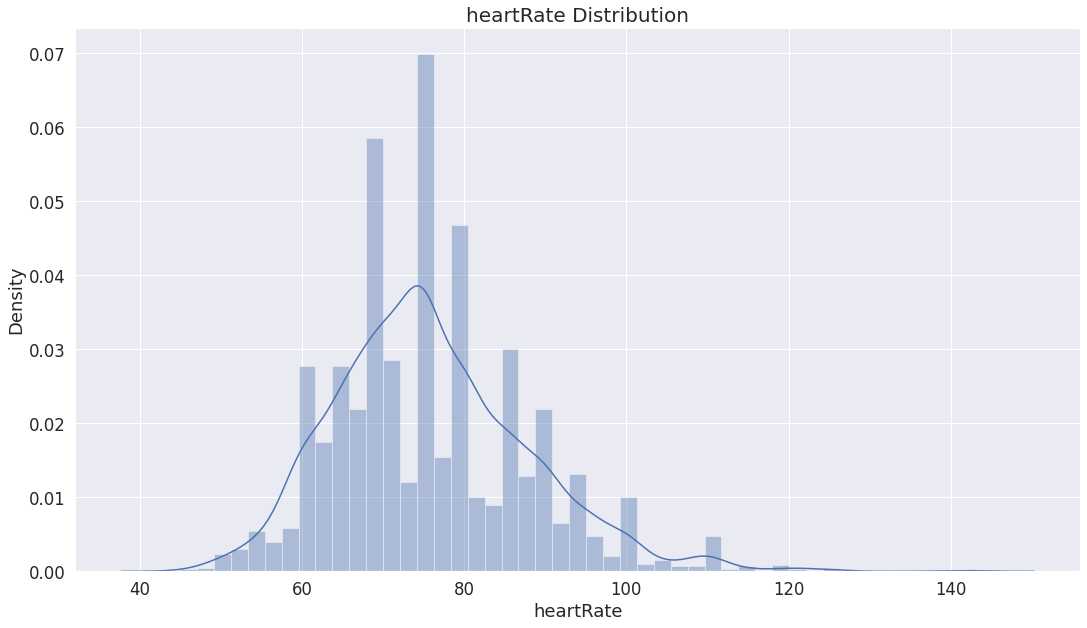

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


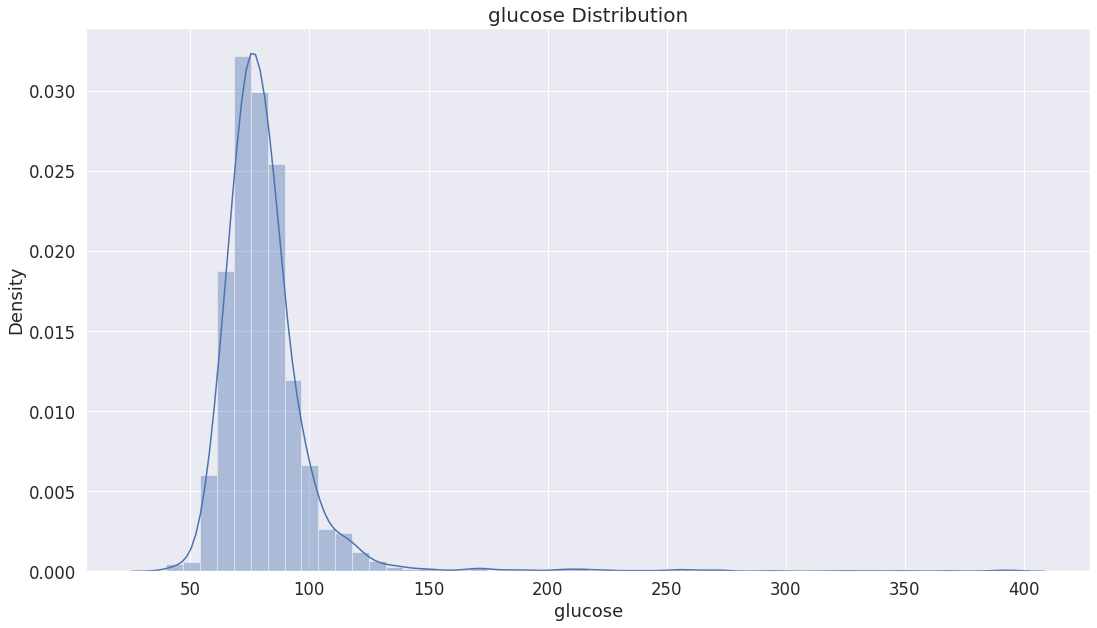

In [51]:
numeric_features = ['cigsPerDay', 'totChol','avgBP', 'BMI', 'heartRate', 'glucose']
for feature in numeric_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.distplot(crp_df[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

### Density plots after using different transformations

In [52]:
# crp_df["cigsPerDay"] = crp_df["cigsPerDay"].astype(int)
# crp_df["cigsPerDay"] = pd.to_numeric(crp_df["cigsPerDay"], errors='coerce')
# crp_df["cigsPerDay"].astype(np.float).astype("Int32")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


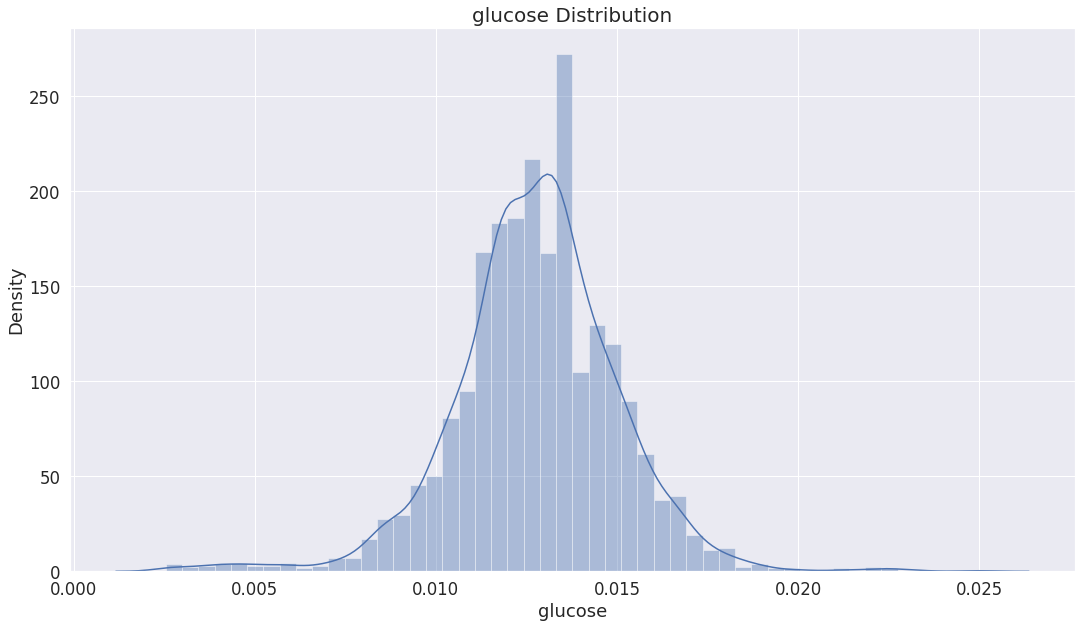

In [53]:
numeric_features = ['glucose']
for feature in numeric_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.distplot(np.reciprocal(crp_df[feature]))
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


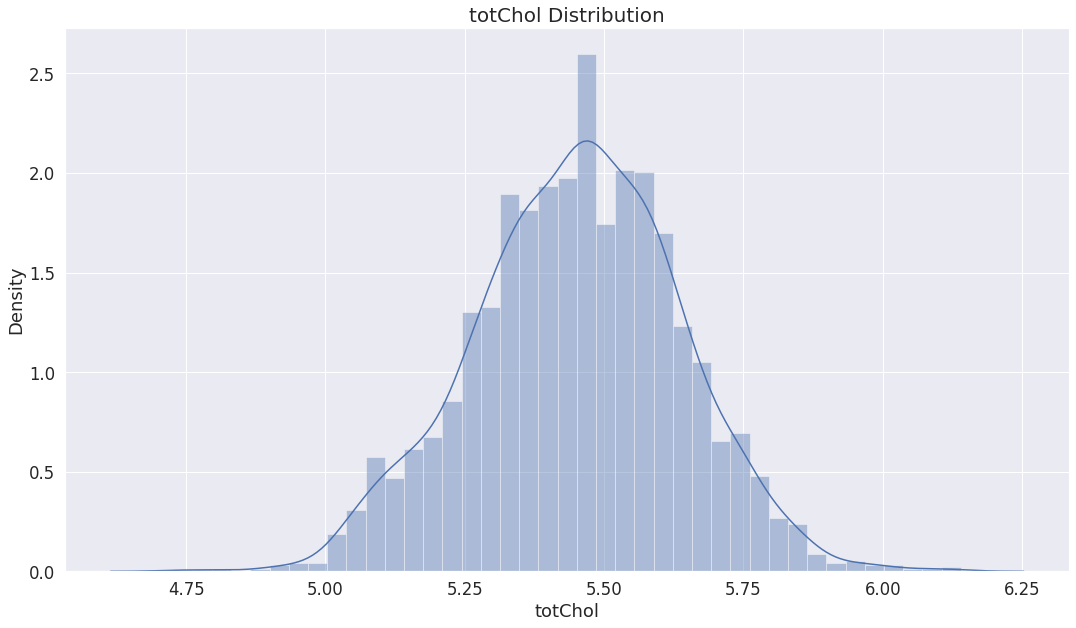

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


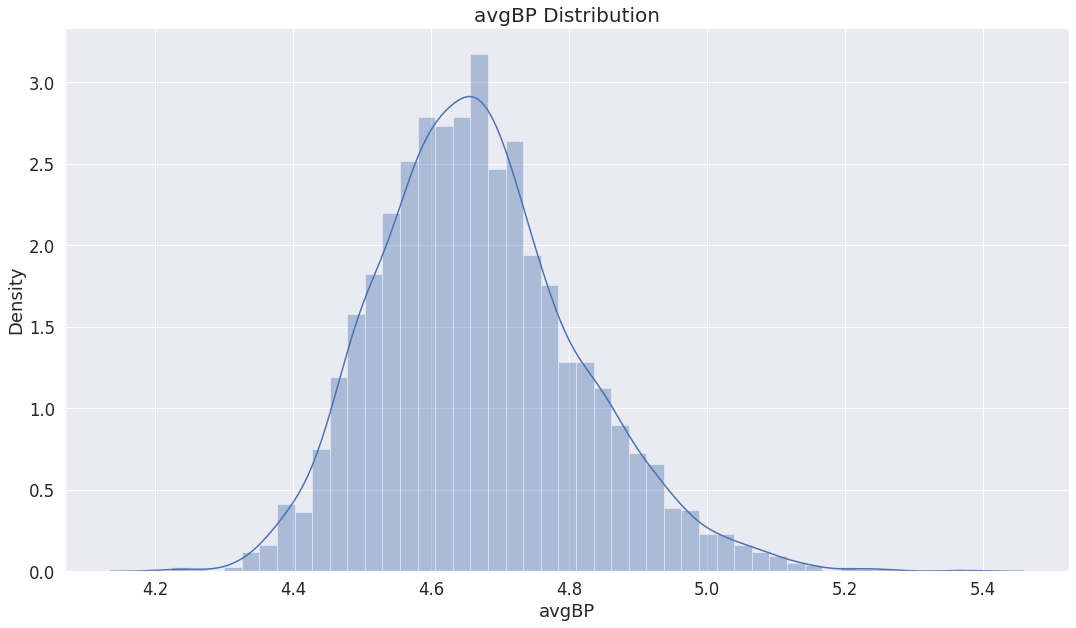

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


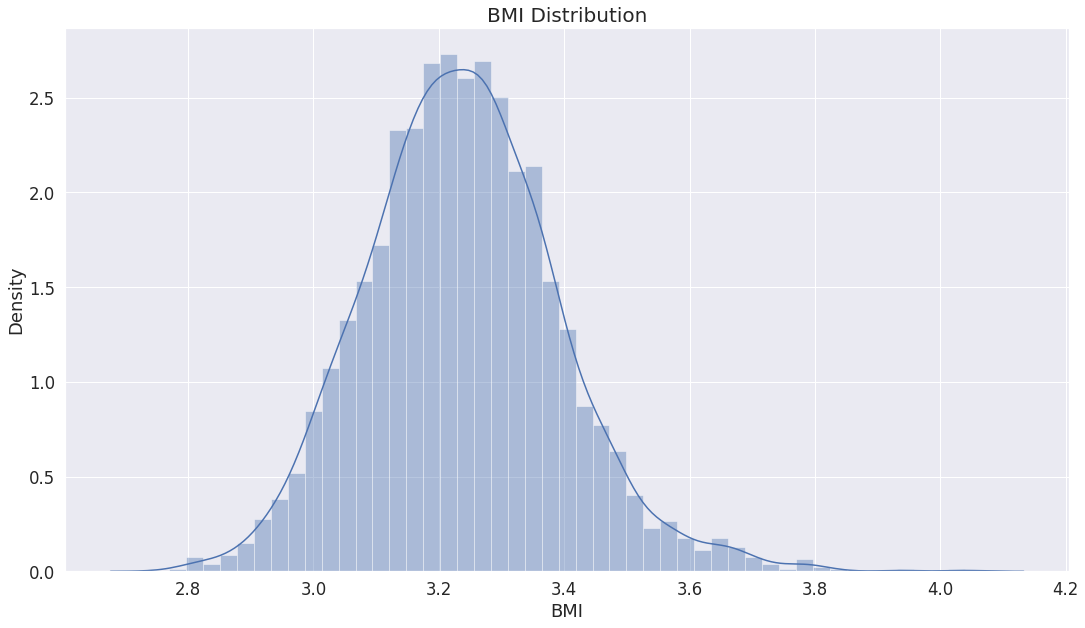

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


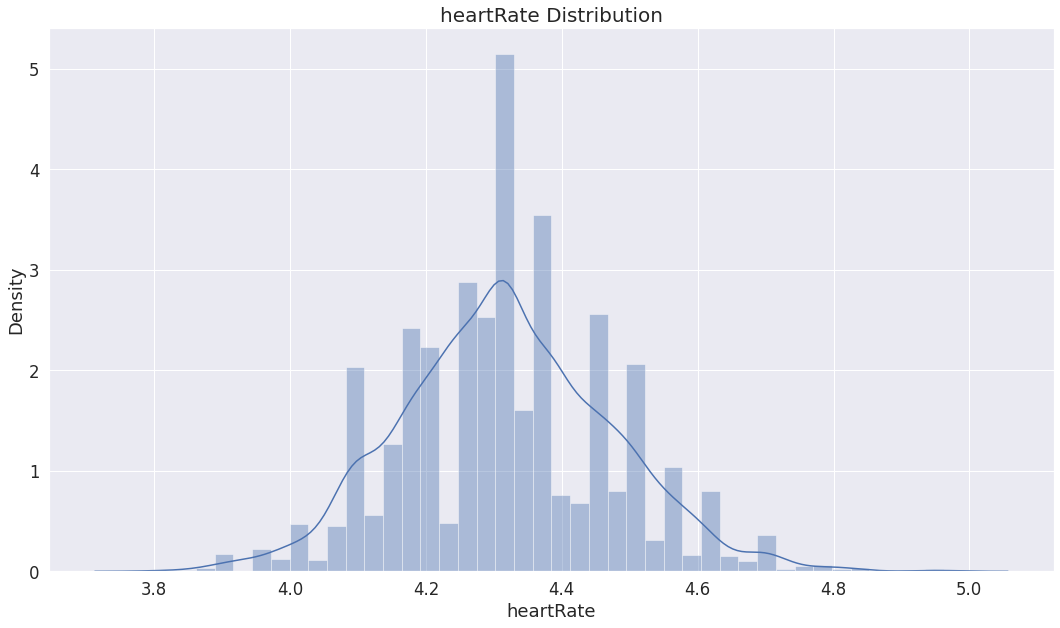

In [54]:
numeric_features = ['totChol','avgBP', 'BMI', 'heartRate']
for feature in numeric_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.distplot(np.log(crp_df[feature]))
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [56]:
ncrp = crp_df.copy()

In [57]:
ncrp.head()

,age,sex,is_smoking,cigsPerDay,prevalentHyp,totChol,BMI,heartRate,glucose,TenYearCHD,avgBP
1,36,1,0,0.0,1,212.0,29.77,72.0,75.0,0,133.00
2,46,0,1,10.0,0,250.0,20.35,88.0,94.0,0,93.50
3,50,1,1,20.0,1,233.0,28.26,68.0,94.0,1,123.00
4,64,0,1,30.0,0,241.0,26.42,70.0,77.0,0,110.75
5,61,0,0,0.0,1,272.0,32.80,85.0,65.0,1,151.50


In [58]:
ncrp['cigsPerDay'].isnull().sum()

0

In [59]:
X = ncrp.drop(['TenYearCHD'], axis=1)
y = ncrp['TenYearCHD']

In [60]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [61]:
X = pd.DataFrame(X,columns= (ncrp.drop(['TenYearCHD'], axis=1).columns))
X

,age,sex,is_smoking,cigsPerDay,prevalentHyp,totChol,BMI,heartRate,glucose,avgBP
0,-1.571058,1.112976,-0.989123,-0.767225,1.477801,-0.566934,0.962152,-0.324744,-0.287113,1.545764
1,-0.407871,-0.898492,1.010997,0.074413,-0.676681,0.294629,-1.318652,1.011803,0.501824,-0.873303
2,0.057404,1.112976,1.010997,0.916051,1.477801,-0.090807,0.596545,-0.658881,0.501824,0.933342
3,1.685866,-0.898492,1.010997,1.757689,-0.676681,0.090575,0.151038,-0.491813,-0.204067,0.183125
4,1.336910,-0.898492,-0.989123,-0.767225,1.477801,0.793429,1.695786,0.761200,-0.702344,2.678746
...,...,...,...,...,...,...,...,...,...,...
2921,1.336910,-0.898492,-0.989123,-0.767225,1.477801,-0.453571,0.286627,2.431885,1.290762,1.607007
2922,1.220591,-0.898492,-0.989123,-0.767225,-0.676681,0.544029,0.843511,-0.491813,0.875531,-0.398676
2923,-0.407871,-0.898492,-0.989123,-0.767225,-0.676681,-0.861680,-0.928834,0.343529,0.086594,-1.761316
2924,-0.640508,1.112976,1.010997,-0.514734,1.477801,2.607246,0.756347,-0.241210,-0.411682,2.066323


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


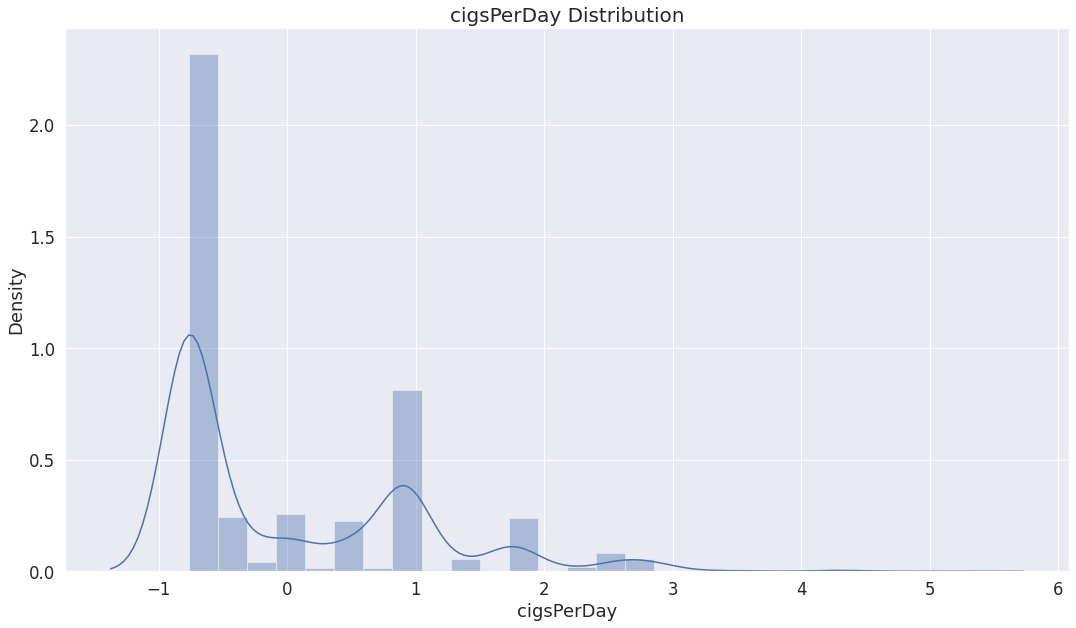

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


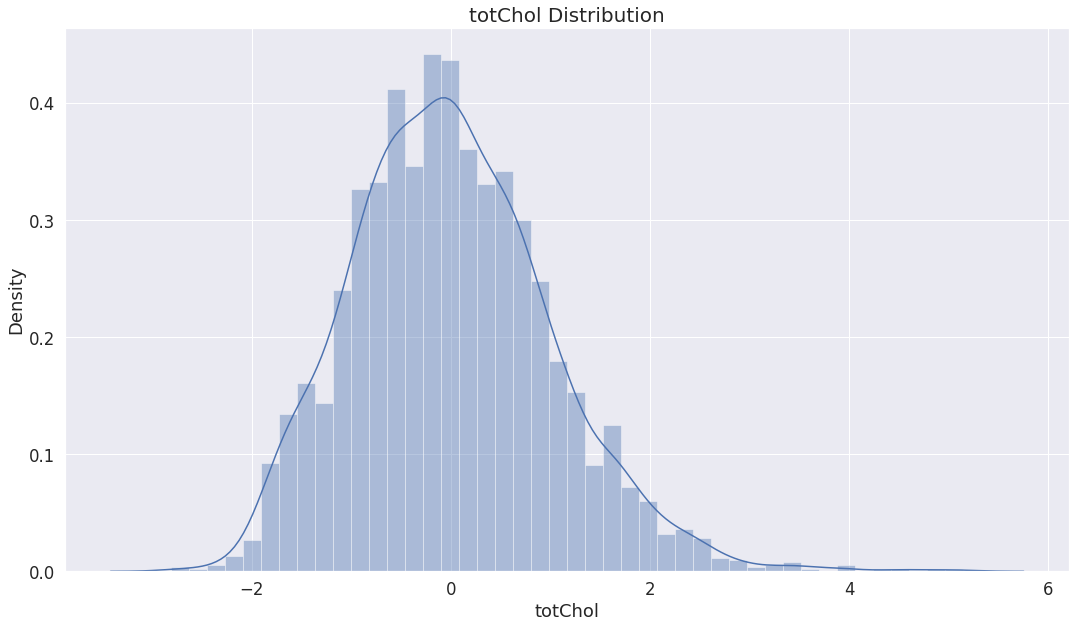

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


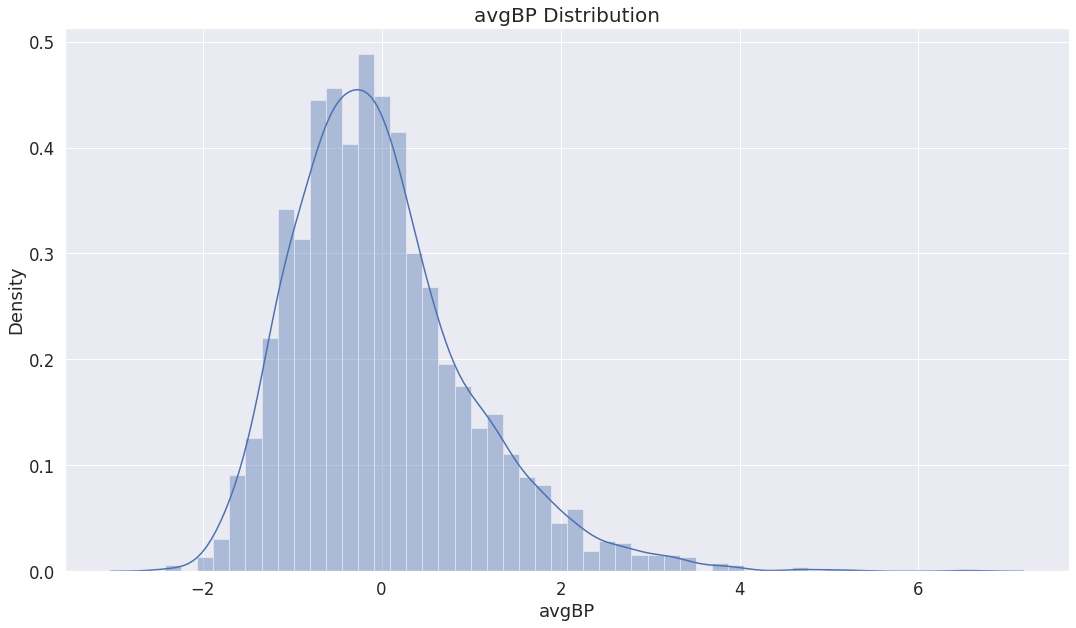

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


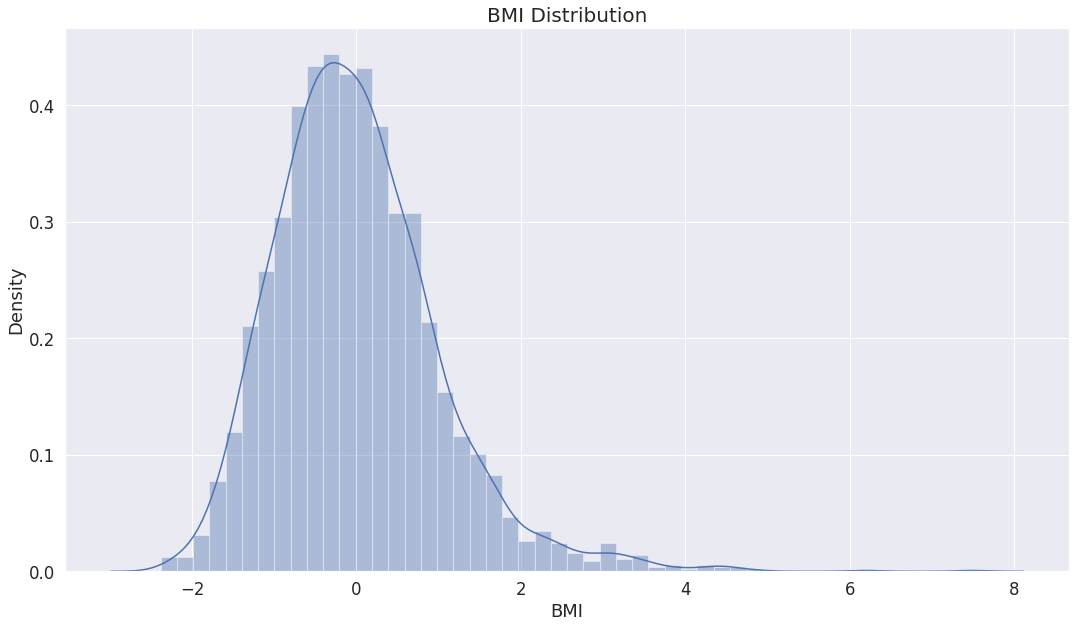

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


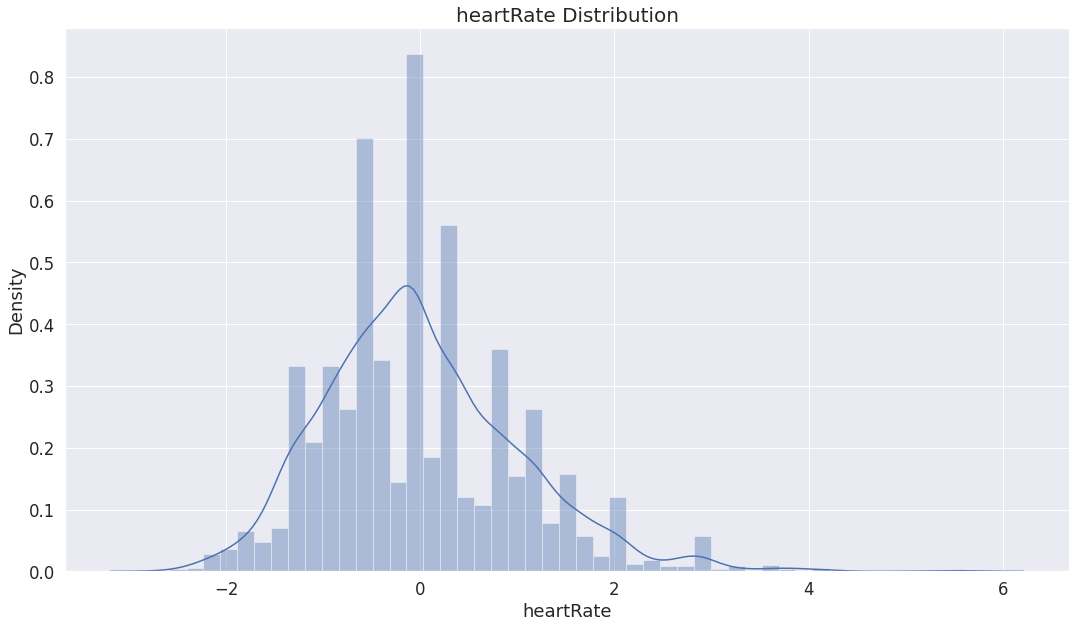

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


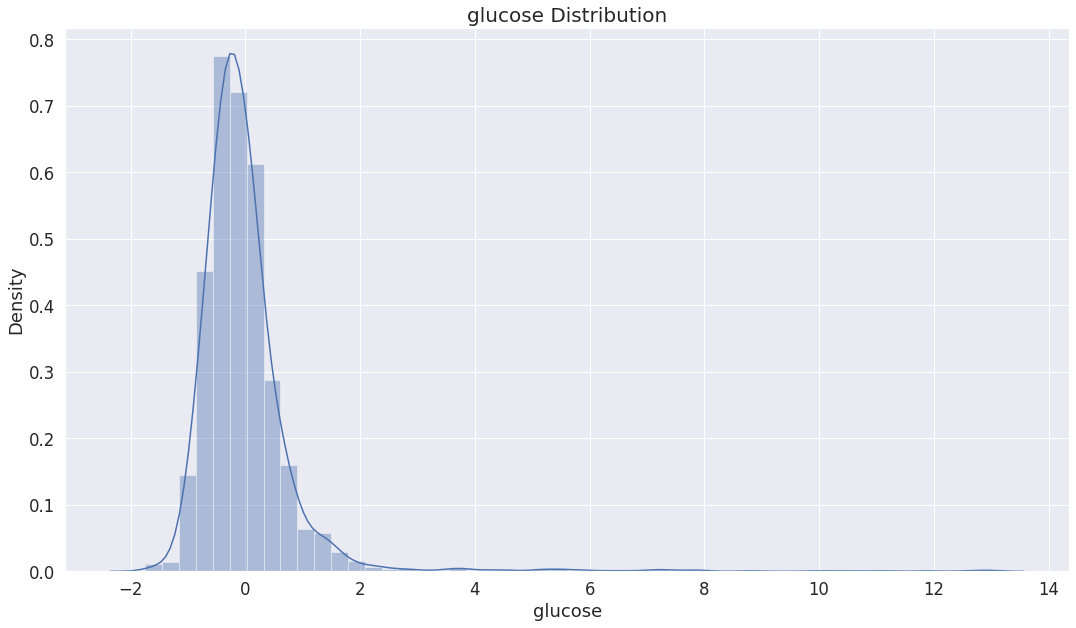

In [62]:
numeric_features = ['cigsPerDay','totChol','avgBP', 'BMI', 'heartRate', 'glucose']
for feature in X[numeric_features]:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.distplot(X[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

***Among the numerical features:***

totChol, avgBP,BMI and heartRate has an uniform distribution.

Glucose shows quite a bit and slight right skewness respectively but since we are concerned about people with cardiovascular issues we consider the right skewed values as an important information so we left it as it is.

cigsPerDay has a highly uneven distribution with high variance hence we used scaling technique called sqrt transformation to reduce the uneven distribution which is depicted in the plot below.

In [63]:
X['cigsPerDay'].isnull().sum()

0

The Transformation part is commented since after doing transformation we are getting 1809 NaN values.

ask richa???????????????????

In [64]:
# X['cigsPerDay']= np.sqrt(X['cigsPerDay'])

In [65]:
# numeric_features = ['cigsPerDay']
# for feature in X[numeric_features]:
#     plt.figure(figsize=(18, 10), facecolor='w')
#     sns.distplot(X[feature])
#     plt.title('{} Distribution'.format(feature), fontsize=20)
#     plt.show()

## Modeling

In [66]:
X.shape

(2926, 10)

In [67]:
y.value_counts()

0    2483
1     443
Name: TenYearCHD, dtype: int64

In [68]:
print(f'the percentage of people having heart deisease is {(443/2926)*100}')
print(f'the percentage of people having No heart deisease is {(2483/2926)*100}')

the percentage of people having heart deisease is 15.140123034859876
the percentage of people having No heart deisease is 84.85987696514013


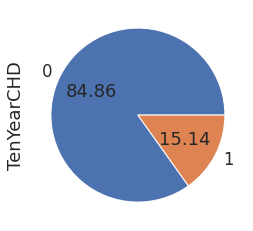

In [69]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f')

Since we have a class imbalance. We are using cost sensitive learning (adding more weights to the minority classes)and trying to improve the models performance.

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=44)

In [71]:
print("Train set",":",X_train.shape[0])
print("Test set",":",X_test.shape[0])

Train set : 2340
Test set : 586
